<a href="https://colab.research.google.com/github/thwlruss10/VDA_pipeline/blob/main/DIP_Final_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


CUDA Available: False
CUDA Device: None


In [ ]:
!pip install transformers datasets evaluate gradio --quiet

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from transformers import ViltProcessor, ViltForQuestionAnswering
from PIL import Image
from IPython.display import display
import torch
from evaluate import load
import gradio as gr

In [ ]:
# Captioning model: BLIP
caption_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# VQA model: ViLT (you may already have this in your notebook)
vqa_processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
vqa_model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [ ]:
def generate_caption(image):
    inputs = caption_processor(images=image, return_tensors="pt")
    out = caption_model.generate(**inputs)
    caption = caption_processor.decode(out[0], skip_special_tokens=True)
    return caption

def answer_question(image, question):
    encoding = vqa_processor(image, question, return_tensors="pt")
    outputs = vqa_model(**encoding)
    logits = outputs.logits
    predicted_idx = logits.argmax(-1).item()
    return vqa_model.config.id2label[predicted_idx]

Please upload an image


Saving 0325_small_living_room_furniture_square.jpg to 0325_small_living_room_furniture_square (1).jpg


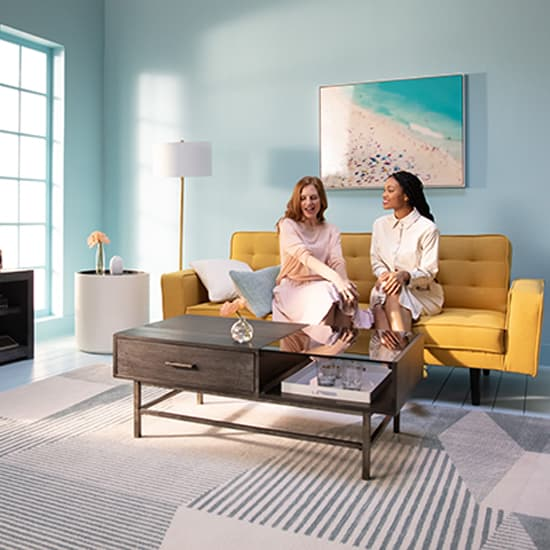


📝 Generated Caption: two women sitting on a couch in a living room

Type your question about the image below and press Enter:


Text(value='', description='Ask:', layout=Layout(width='80%'), placeholder='e.g., What is the person doing?')

Output()

In [ ]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output

# Step 1: Upload Image
print("Please upload an image")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
image = Image.open(img_path).convert("RGB")
display(image)

# Step 2: Auto-generate caption
caption = generate_caption(image)
print(f"\n📝 Generated Caption: {caption}")

# Step 3: Ask a question
question_widget = widgets.Text(
    description='Ask:',
    placeholder='e.g., What is the person doing?',
    layout=widgets.Layout(width='80%')
)

output = widgets.Output()

def on_submit(change):
    question = change.new
    answer = answer_question(image, question)
    with output:
        clear_output()
        print(f"\n🤖 Answer: {answer}")

question_widget.observe(on_submit, names='value')

print("\nType your question about the image below and press Enter:")
display(question_widget, output)
